### Work Flow
Data ---> Data Preprocessing ---> Data Analysis ---> Model Preparation & Prediction ---> Model Evaluation

In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [4]:
# loading the data
iris = pd.read_csv('IRIS.csv')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Preprocessing

In [5]:
# getting information of the dataframe
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# checking for missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Data Analysis

In [7]:
# check the various species of iris flowers
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
# set the background of the incoming graphs
sns.set()

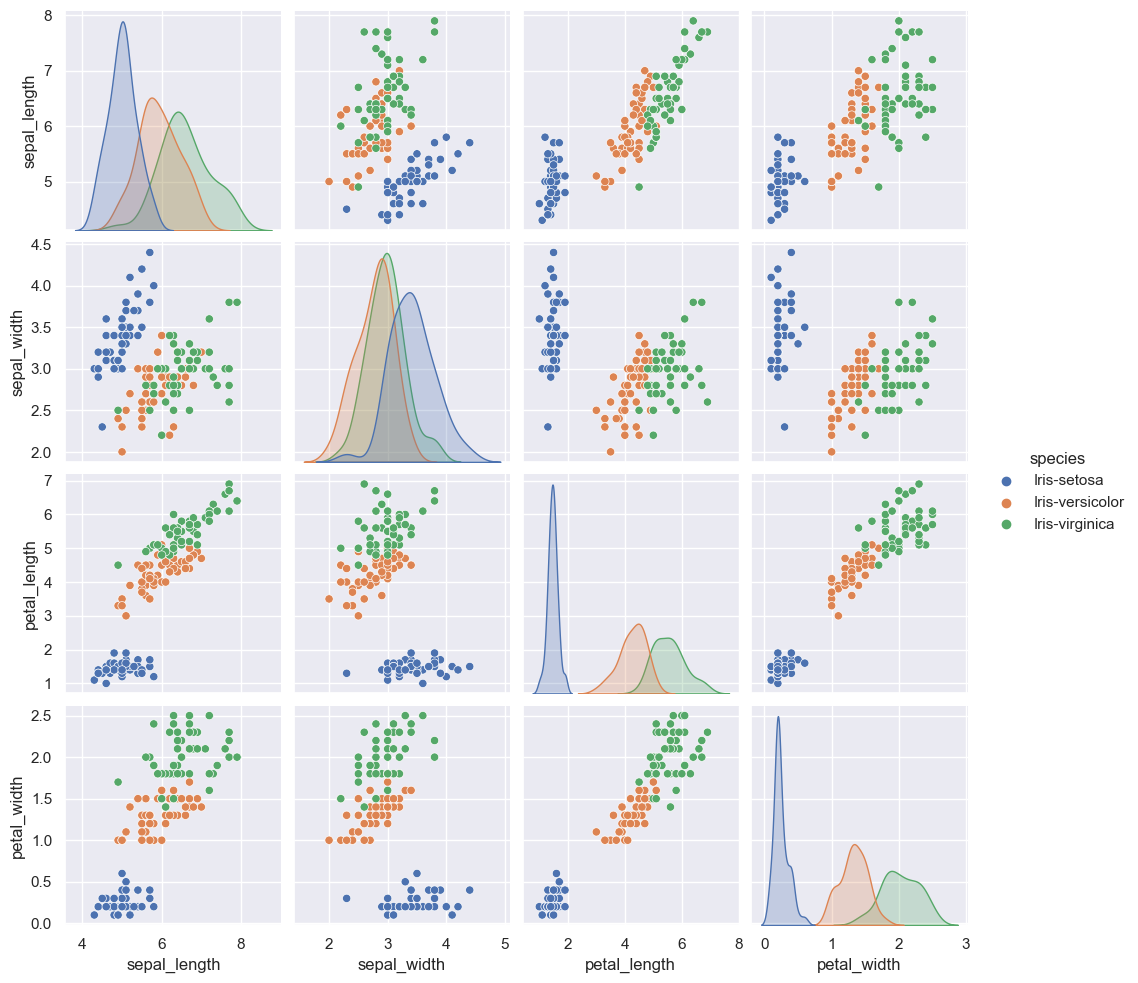

In [9]:
# plot a pairplot
sns.pairplot(iris, hue='species')
plt.show()

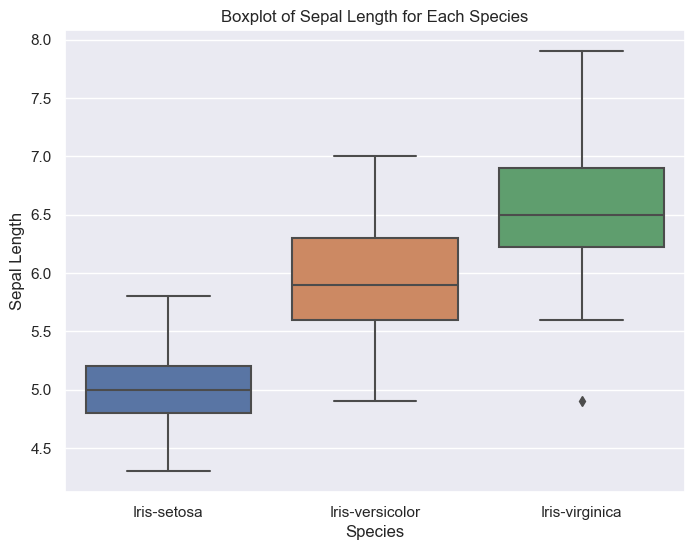

In [10]:
# plot a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris, x='species', y='sepal_length')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Boxplot of Sepal Length for Each Species')
plt.show()

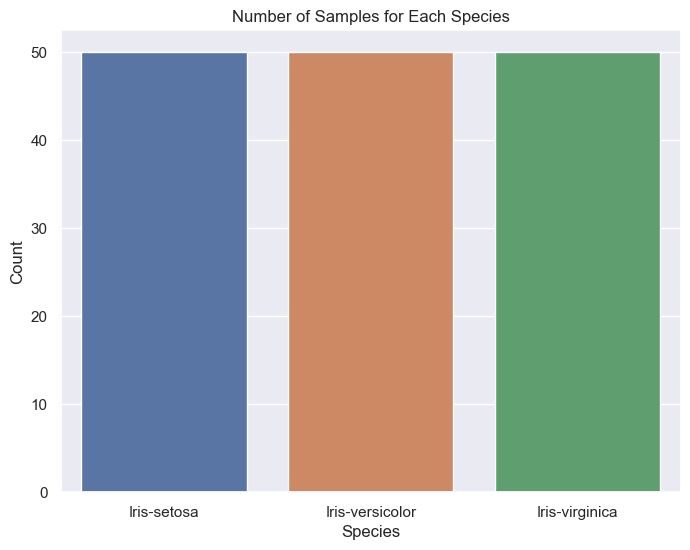

In [12]:
# plot a barplot
plt.figure(figsize=(8, 6))
species_counts = iris['species'].value_counts()
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Number of Samples for Each Species')
plt.show()

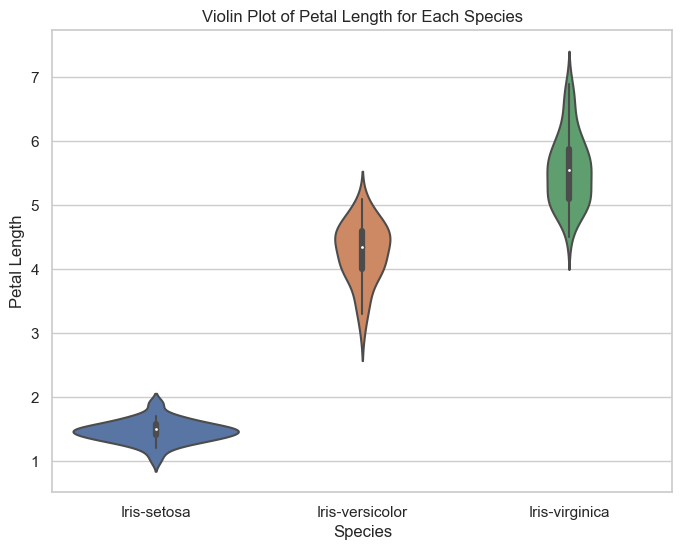

In [25]:
# violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='petal_length', data=iris)
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Violin Plot of Petal Length for Each Species')
plt.show()

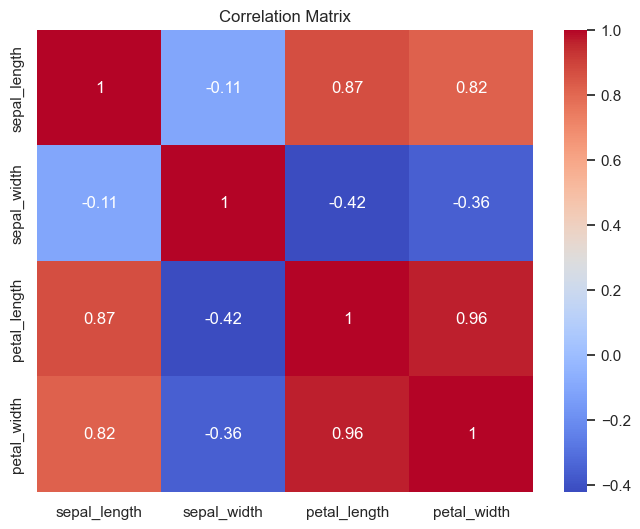

In [16]:
# Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

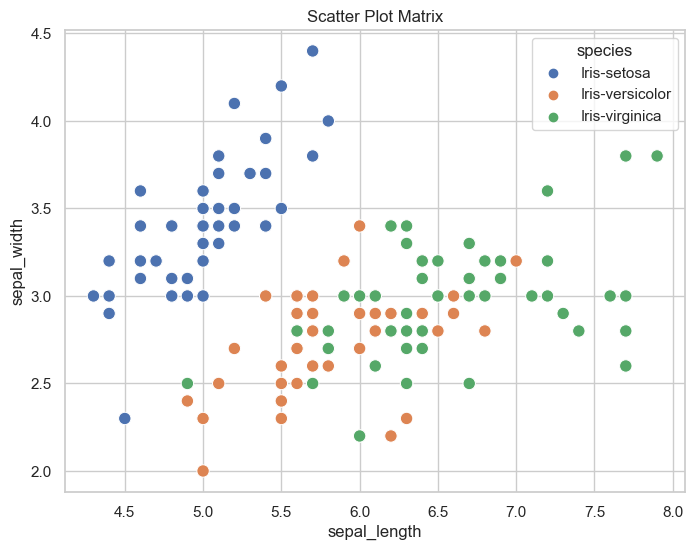

In [17]:
# Scatter plot matrix
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', s=80)
plt.title('Scatter Plot Matrix')
plt.show()

In [27]:
sns.set()

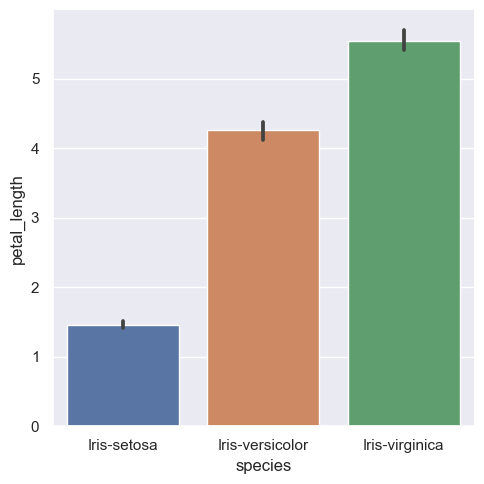

In [28]:
sns.catplot(x='species', y='petal_length', data=iris, kind='bar')
plt.show()

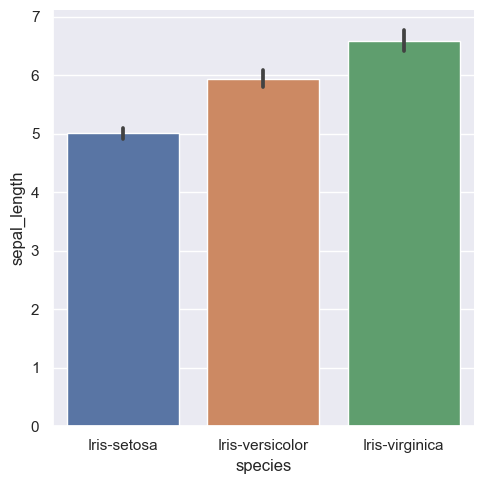

In [29]:
sns.catplot(x='species', y='sepal_length', data=iris, kind='bar')
plt.show()

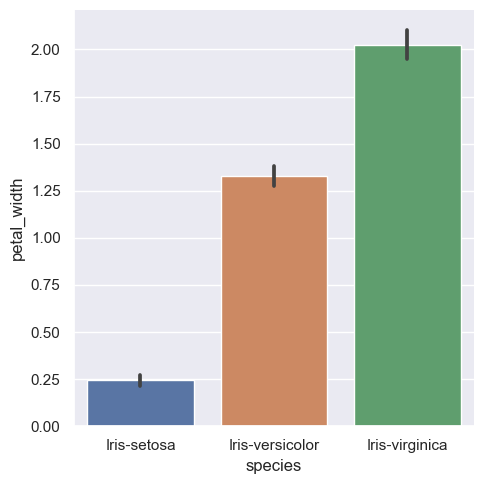

In [30]:
sns.catplot(x='species', y='petal_width', data=iris, kind='bar')
plt.show()

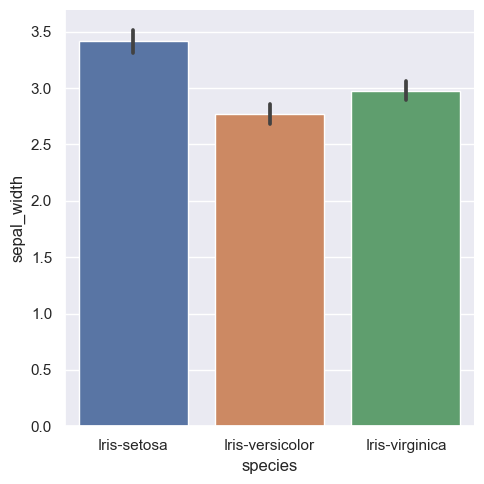

In [31]:
sns.catplot(x='species', y='sepal_width', data=iris, kind='bar')
plt.show()

### Model Preparation

In [26]:
# importing libraries for machine learning
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [32]:
# Separate features and labels
X = iris.drop('species', axis=1)
y = iris['species']

In [33]:
# Encode labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [34]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# perform feature engineering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###### Logistic Regression

In [37]:
# Model 1
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [38]:
# Model 2
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test_scaled)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [39]:
# Model 3
# Create and train the logistic regression model
model = LogisticRegression()

# define the hyperparameter grid for tuning
param_grid = {'C': [0.1, 1.0, 10.0],
             'penalty': ['l1', 'l2']}

# perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predict the labels for the test set
y_pred = best_model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [40]:
# Model 4
# Create and train the logistic regression model
model = LogisticRegression()

# define the hyperparameter grid for tuning
param_grid = {'C': [0.1, 1.0, 10.0],
             'penalty': ['l1', 'l2']}

# perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predict the labels for the test set
y_pred = best_model.predict(X_test_scaled)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Value

###### Decision Trees

In [41]:
# Model 1
# Create and train the logistic regression model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [42]:
# Model 2
# Create and train the logistic regression model
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test_scaled)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [43]:
# Model 3
# Create and train the logistic regression model
model =  DecisionTreeClassifier()

# define the hyperparameter grid for tuning
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [None, 5, 10, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 3]}

# perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predict the labels for the test set
y_pred = best_model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [45]:
# Model 4
# Create and train the logistic regression model
model =  DecisionTreeClassifier()

# define the hyperparameter grid for tuning
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [None, 5, 10, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 3]}

# perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predict the labels for the test set
y_pred = best_model.predict(X_test_scaled*100)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 71.11111111111111
[[19  0  0]
 [ 3  0 10]
 [ 0  0 13]]


###### Random Forest Classifier

In [46]:
# Model 1
# Create and train the logistic regression model
model =  RandomForestClassifier()
model.fit(X_train, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [47]:
# Model 2
# Create and train the logistic regression model
model =  RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test_scaled)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [48]:
# Model 3
# Create and train the logistic regression model
model =  RandomForestClassifier()

# define the hyperparameter grid for tuning
param_grid = {'n_estimators': [100, 200, 300],
             'max_depth': [None, 5, 10, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 3]}

# perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predict the labels for the test set
y_pred = best_model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [49]:
# Model 4
# Create and train the logistic regression model
model =  RandomForestClassifier()

# define the hyperparameter grid for tuning
param_grid = {'n_estimators': [100, 200, 300],
             'max_depth': [None, 5, 10, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 3]}

# perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predict the labels for the test set
y_pred = best_model.predict(X_test_scaled*100)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7111111111111111
[[19  0  0]
 [ 4  0  9]
 [ 0  0 13]]


###### Support Vector Machines

In [50]:
# Model 1
# Create and train the logistic regression model
model =  SVC()
model.fit(X_train, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [51]:
# Model 2
# Create and train the logistic regression model
model =  SVC()
model.fit(X_train_scaled, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test_scaled)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [52]:
# Model 3
# Create and train the logistic regression model
model =  SVC()

# define the hyperparameter grid for tuning
param_grid = {'C': [0.1, 1, 10],
             'kernel': ['linear', 'rbf', 'poly'],
             'gamma': ['scale', 'auto']}

# perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predict the labels for the test set
y_pred = best_model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 97.77777777777777
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [53]:
# Model 4
# Create and train the logistic regression model
model =  SVC()

# define the hyperparameter grid for tuning
param_grid = {'C': [0.1, 1, 10],
             'kernel': ['linear', 'rbf', 'poly'],
             'gamma': ['scale', 'auto']}

# perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predict the labels for the test set
y_pred = best_model.predict(X_test_scaled*100)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7111111111111111
[[19  0  0]
 [ 1  0 12]
 [ 0  0 13]]


###### K-Nearest Neighbors 

In [54]:
# Model 1
# Create and train the logistic regression model
model =  KNeighborsClassifier()
model.fit(X_train, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [55]:
# Model 2
# Create and train the logistic regression model
model =  KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test_scaled)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [56]:
# Model 3
# Create and train the logistic regression model
model =  KNeighborsClassifier()

# define the hyperparameter grid for tuning
param_grid = {'n_neighbors': [3,5,7],
             'weights': ['uniform', 'distance'],
             'p': [1,2]}

# perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predict the labels for the test set
y_pred = best_model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [58]:
# Model 4
# Create and train the logistic regression model
model =  KNeighborsClassifier()

# define the hyperparameter grid for tuning
param_grid = {'n_neighbors': [3,5,7],
             'weights': ['uniform', 'distance'],
             'p': [1,2]}

# perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predict the labels for the test set
y_pred = best_model.predict(X_test_scaled*100)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 80.0
[[19  0  0]
 [ 0  4  9]
 [ 0  0 13]]
